## Import Data

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [331]:
#load data
df_train = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/train.csv')
df_test = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/test.csv')

df_trans = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/transactions.csv')
df_store = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/stores.csv')
df_oil = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/oil.csv')
df_holid = pd.read_csv('/Users/jiemi/Desktop/store-sales-time-series-forecasting/holidays_events.csv')

In [332]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [333]:
df_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [334]:
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [335]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [336]:
df_holid.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## Data Merging and Data Cleaning

In [337]:
#merge training data
df_trainm = df_train.merge(df_trans, how='left', on=['date','store_nbr'])
df_trainm = df_trainm.merge(df_store, how='left', on='store_nbr')
df_trainm = df_trainm.merge(df_oil, how='left', on='date')
df_trainm = df_trainm.merge(df_holid, how='left', on='date')

In [338]:
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [339]:
df_trainm.describe()

,id,store_nbr,sales,onpromotion,transactions,cluster,dcoilwtico
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.805231e+06,3.054348e+06,2.099196e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,1.697071e+03,8.481481e+00,6.801587e+01
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,9.668317e+02,4.649735e+00,2.569134e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.619000e+01
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,1.046000e+03,4.000000e+00,4.641000e+01
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,1.395000e+03,8.500000e+00,5.343000e+01
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,2.081000e+03,1.300000e+01,9.581000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,8.359000e+03,1.700000e+01,1.106200e+02


In [340]:
df_trainm = df_trainm.rename(columns={'type_x':'store_type','type_y':'holid_type'})

In [341]:
df_trainm['date']=pd.to_datetime(df_trainm['date'])
df_trainm['year']= df_trainm['date'].dt.year
df_trainm['month']= df_trainm['date'].dt.month
df_trainm['week']= df_trainm['date'].dt.isocalendar().week
df_trainm['quarter']= df_trainm['date'].dt.quarter
df_trainm['day_of_week']= df_trainm['date'].dt.day_name()

In [342]:
df_trainm.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
transactions     249117
city                  0
state                 0
store_type            0
cluster               0
dcoilwtico       955152
holid_type      2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [343]:
df_trainm.nunique()

id              3000888
date               1684
store_nbr            54
family               33
sales            379610
onpromotion         362
transactions       4993
city                 22
state                16
store_type            5
cluster              17
dcoilwtico          994
holid_type            6
locale                3
locale_name          24
description         101
transferred           2
year                  5
month                12
week                 53
quarter               4
day_of_week           7
dtype: int64

In [344]:
#data cleaning: handling missing value 
df_trainm.transactions = df_trainm.transactions.replace(np.nan,0)
df_trainm[['locale','locale_name', 'description']] = df_trainm[['locale','locale_name', 'description']].replace(np.nan,'unknown')
df_trainm['holid_type'] = df_trainm['holid_type'].replace(np.nan,'Work Day')
df_trainm['transferred'] = df_trainm['transferred'].replace(np.nan,False)

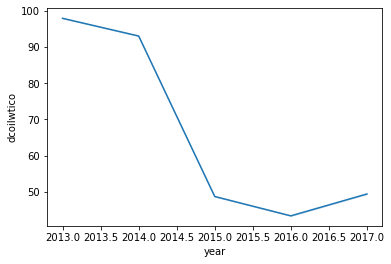

In [345]:
# data cleaning: handling oil price missing value
# back fill:the missing value is imputed using the next value
sns.lineplot(data=df_trainm,x='year',y='dcoilwtico')
df_trainm['dcoilwtico'] = df_trainm['dcoilwtico'].fillna(method='bfill')

## Exploratory Data Analysis (Visualisation)

Business interest-from cross section perspective:

In [346]:
# avergae sales distribution in different stores, product family and cluster
df_store_sales = df_trainm.groupby('store_type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_family_sales =df_trainm.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_cluster_sales =df_trainm.groupby('cluster').agg({'sales':'mean'}).reset_index().sort_values(by='sales',ascending=False)

In [347]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [348]:
df_family_sales['color'] = '#8442b3'
df_family_sales['color'][2:] = '#af89c9'
df_cluster_sales['color'] = '#af89c9'

In [349]:
#make chart: https://github.com/plotly/plotly.py/blob/master/doc/python/subplots.md
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Top 10 Highest Product Sales", "Highest Sales in Stores", "Clusters Vs Sales"))
#family bar chart
fig.add_trace(go.Bar(x=df_family_sales['sales'], y=df_family_sales['family'], marker=dict(color= df_family_sales['color']),
                     name='Family', orientation='h'), 
                     row=1, col=1)
#store type pie chart
fig.add_trace(go.Pie(values=df_store_sales['sales'], labels=df_store_sales['store_type'], name='Store type',
                     marker=dict(colors=['#8f74cd','#a682f8','#b292fc','#cebff0','#d9d2e9']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
#cluster bar chart
fig.add_trace(go.Bar(x=df_cluster_sales['cluster'], y=df_cluster_sales['sales'], 
                     marker=dict(color= df_cluster_sales['color']), name='Cluster'), 
                     row=2, col=1)
# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

Business interest-from time perspective:

In [350]:
# monthly sales per year
df_2013 = df_trainm[df_trainm['year']==2013][['month','sales']]
df_2013 = df_2013.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s13'})
df_2014 = df_trainm[df_trainm['year']==2014][['month','sales']]
df_2014 = df_2014.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s14'})
df_2015 = df_trainm[df_trainm['year']==2015][['month','sales']]
df_2015 = df_2015.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s15'})
df_2016 = df_trainm[df_trainm['year']==2016][['month','sales']]
df_2016 = df_2016.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s16'})
df_2017 = df_trainm[df_trainm['year']==2017][['month','sales']]
df_2017 = df_2017.groupby('month').agg({"sales" : "mean"}).reset_index()
df_2017_no = pd.DataFrame({'month': [9,10,11,12], 'sales':[0,0,0,0]})
df_2017 = df_2017.append(df_2017_no).rename(columns={'sales':'s17'})
df_year = df_2013.merge(df_2014,on='month').merge(df_2015,on='month').merge(df_2016,on='month').merge(df_2017,on='month')

# top levels
top_labels = ['2013', '2014', '2015', '2016', '2017']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# X axis value 
df_year = df_year[['s13','s14','s15','s16','s17']].replace(np.nan,0)
x_data = df_year.values

# y axis value (Month)
df_2013['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2013['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(title='Avg Sales for each Year',
    xaxis=dict(showgrid=False, 
               zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False,
               showticklabels=False, zeroline=False),
    barmode='stack', 
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False, 
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                          showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(
    annotations=annotations)
fig.show()


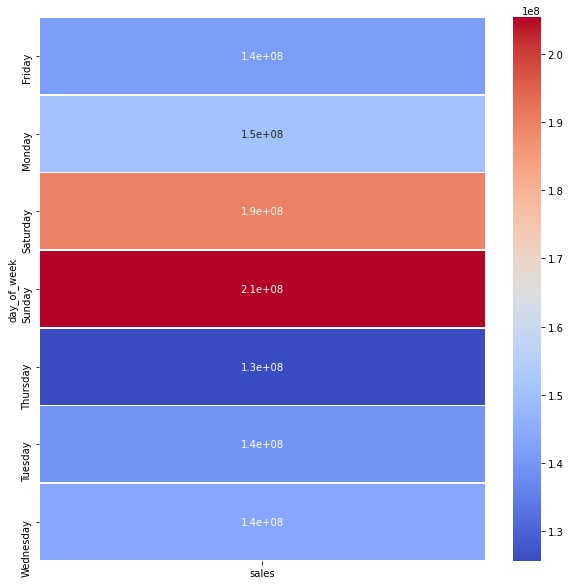

In [351]:
#total sales distribution within a week
table=pd.pivot_table(df_trainm, values ='sales', index =['day_of_week'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

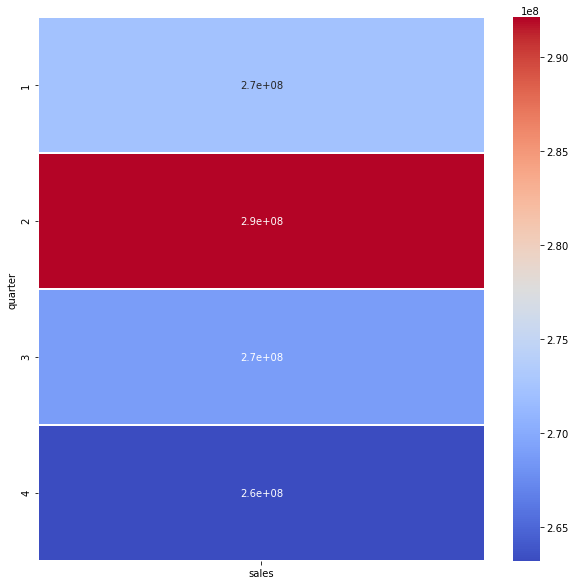

In [352]:
#total sales distribution in four quarters
table=pd.pivot_table(df_trainm, values ='sales', index =['quarter'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

## Data Manipulation 

In [353]:
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,store_type,...,holid_type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,Quito,Pichincha,D,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,Quito,Pichincha,D,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,Quito,Pichincha,D,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,Quito,Pichincha,D,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,Quito,Pichincha,D,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday


In [354]:
df_trainm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   transactions  float64       
 7   city          object        
 8   state         object        
 9   store_type    object        
 10  cluster       int64         
 11  dcoilwtico    float64       
 12  holid_type    object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   bool          
 17  year          int64         
 18  month         int64         
 19  week          UInt32        
 20  quarter       int64         
 21  day_of_week   object        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(3), int64(7), ob

In [355]:
# seperate 7 day_in_week into 2 categories: weekday and weekend 
day_week = {
    'Monday':'Weekday',
    'Tuesday':'Weekday',
    'Wednesday':'Weekday',
    'Thursday':'Weekday',
    'Friday':'Weekday',
    'Saturday':'Weekend',
    'Sunday':'Weekend'
}

df_trainm['day_in_week']=df_trainm['day_of_week'].map(day_week)
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,store_type,...,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week,day_in_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday


In [356]:
# seperate family into 2 categories: popular and unpopular
fa_sa = df_trainm.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)

new_fam1={}
keys=fa_sa[fa_sa['sales']>85]['family'].to_numpy()
for i in range(len(keys)):
    new_fam1[keys[i]] = 'Popular Genre'

new_fam2={}
key=fa_sa[fa_sa['sales']<85]['family'].to_numpy()
for i in range(len(key)):
    new_fam2[key[i]] = 'Unpopular Genre'

new_fam = {}
new_fam.update(new_fam1)
new_fam.update(new_fam2)

df_trainm['new_family']=df_trainm['family'].map(new_fam)
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,store_type,...,locale_name,description,transferred,year,month,week,quarter,day_of_week,day_in_week,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,Quito,Pichincha,D,...,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday,Unpopular Genre
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,Quito,Pichincha,D,...,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday,Unpopular Genre
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,Quito,Pichincha,D,...,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday,Unpopular Genre
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,Quito,Pichincha,D,...,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday,Popular Genre
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,Quito,Pichincha,D,...,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday,Weekday,Unpopular Genre


<AxesSubplot:xlabel='family', ylabel='sales'>

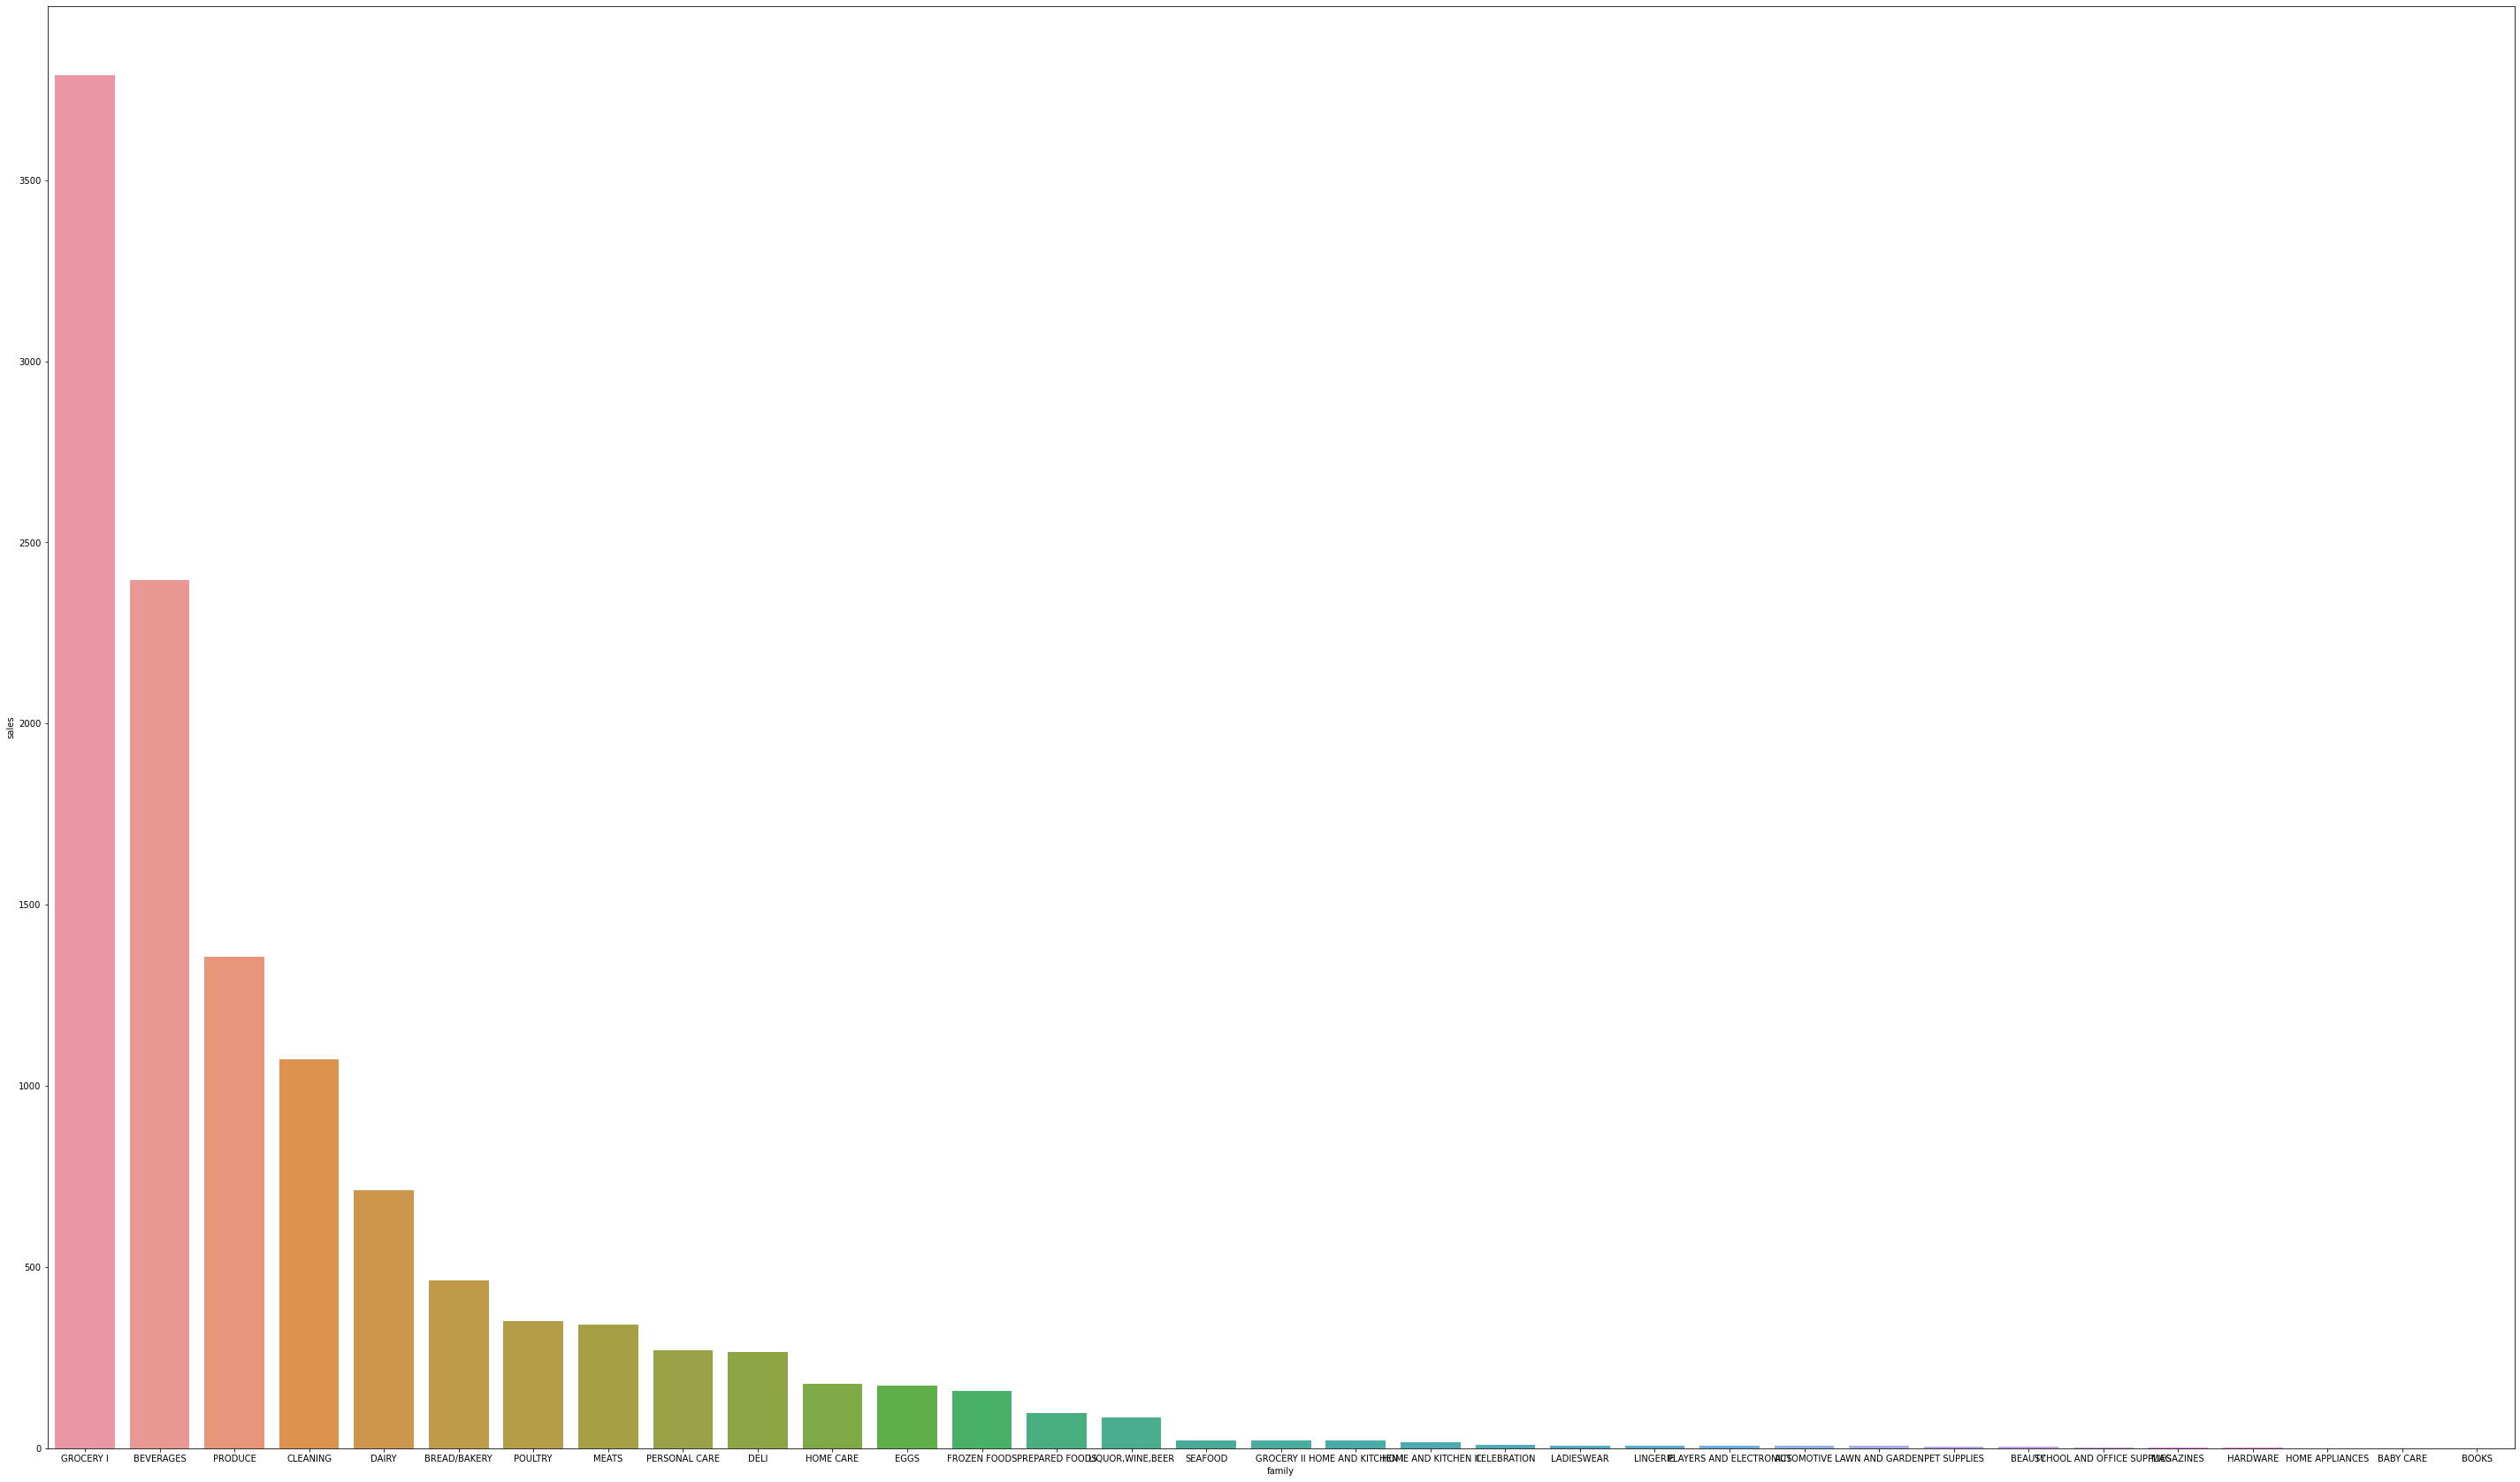

In [357]:
plt.figure(figsize=(50,30))
sns.barplot(data=fa_sa,x='family',y='sales')

In [358]:
df_trainm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   transactions  float64       
 7   city          object        
 8   state         object        
 9   store_type    object        
 10  cluster       int64         
 11  dcoilwtico    float64       
 12  holid_type    object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   bool          
 17  year          int64         
 18  month         int64         
 19  week          UInt32        
 20  quarter       int64         
 21  day_of_week   object        
 22  day_in_week   object        
 23  new_family    object        
dty

In [359]:
df_trainm.drop(['family','state','locale_name','description','day_of_week','id'],axis=1,inplace=True)

In [360]:
df_trainm.head()

,date,store_nbr,sales,onpromotion,transactions,city,store_type,cluster,dcoilwtico,holid_type,locale,transferred,year,month,week,quarter,day_in_week,new_family
0,2013-01-01,1,0.0,0,0.0,Quito,D,13,93.14,Holiday,National,False,2013,1,1,1,Weekday,Unpopular Genre
1,2013-01-01,1,0.0,0,0.0,Quito,D,13,93.14,Holiday,National,False,2013,1,1,1,Weekday,Unpopular Genre
2,2013-01-01,1,0.0,0,0.0,Quito,D,13,93.14,Holiday,National,False,2013,1,1,1,Weekday,Unpopular Genre
3,2013-01-01,1,0.0,0,0.0,Quito,D,13,93.14,Holiday,National,False,2013,1,1,1,Weekday,Popular Genre
4,2013-01-01,1,0.0,0,0.0,Quito,D,13,93.14,Holiday,National,False,2013,1,1,1,Weekday,Unpopular Genre


In [361]:
#LabeEncoder city
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_trainm['city'] = LabelEncoder().fit_transform(df_trainm['city'])

In [362]:
#create dummy variables
holiday=pd.get_dummies(df_trainm['holid_type'],drop_first=True)
local=pd.get_dummies(df_trainm['locale'],drop_first=True)
day_week=pd.get_dummies(df_trainm['day_in_week'],drop_first=True)
fam=pd.get_dummies(df_trainm['new_family'],drop_first=True)
store=pd.get_dummies(df_trainm['store_type'],drop_first=True)

df_trainm.drop(['holid_type','locale','day_in_week','new_family','store_type'],axis=1,inplace=True)


In [363]:
df_trainm = pd.concat( [df_trainm,holiday,local,day_week,fam,store],axis=1)

## Modelling

In [364]:
df_trainm=df_trainm.set_index('date')
df_trainm.week = df_trainm.week.astype(int)

In [365]:
df_trainm.head()

,store_nbr,sales,onpromotion,transactions,city,cluster,dcoilwtico,transferred,year,month,...,Work Day,National,Regional,unknown,Weekend,Unpopular Genre,B,C,D,E
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0.0,0,0.0,18,13,93.14,False,2013,1,...,0,1,0,0,0,1,0,0,1,0
2013-01-01,1,0.0,0,0.0,18,13,93.14,False,2013,1,...,0,1,0,0,0,1,0,0,1,0
2013-01-01,1,0.0,0,0.0,18,13,93.14,False,2013,1,...,0,1,0,0,0,1,0,0,1,0
2013-01-01,1,0.0,0,0.0,18,13,93.14,False,2013,1,...,0,1,0,0,0,0,0,0,1,0
2013-01-01,1,0.0,0,0.0,18,13,93.14,False,2013,1,...,0,1,0,0,0,1,0,0,1,0


In [366]:
from sklearn.model_selection import train_test_split

In [367]:
X_train, X_test, y_train, y_test = train_test_split(df_trainm.drop('sales',axis=1), 
                                                    df_trainm['sales'], test_size=0.30)

In [368]:
import xgboost
from xgboost import XGBRegressor

In [369]:
model = XGBRegressor(objective='count:poisson',n_estimators=300, verbosity=3)
xgbmodel = model.fit(X_train, y_train) 

[11:35:48] DEBUG: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/gbm/gbtree.cc:147: Using tree method: 2
[11:35:49] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:35:49] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:35:50] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[11:35:50] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:35:50] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:35:50] INFO: /Users/r

[11:36:38] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[11:36:39] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:36:41] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:36:43] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:36:45] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:36:47] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nod

[11:37:42] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:37:43] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:37:45] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:37:47] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:37:49] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:37:51] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nod

[11:47:25] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:47:27] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:47:29] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:47:30] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:47:31] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[11:47:32] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nod

[11:48:18] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:48:19] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:48:20] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:48:21] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:48:22] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[11:48:23] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nod

[11:49:08] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[11:49:09] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:49:10] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:49:11] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:49:12] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:49:13] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nod

[11:49:58] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:49:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:50:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:50:01] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:50:02] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[11:50:03] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nod

In [370]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions_xgb = model.predict(X_test)
rmse_xgb = sqrt(mean_squared_error(y_test, predictions_xgb))
print("XGBoost - Root Mean Square Error (RMSE): %.3f" % rmse_xgb)

XGBoost - Root Mean Square Error (RMSE): 710.154


In [371]:
predictions_xgb

array([ 0.3096299,  5.3327346,  3.7404404, ...,  1.7580147, 22.55857  ,
        1.9602721], dtype=float32)

In [372]:
#normalised rmse for test data, 0.005 is small
rmse_xgb/df_trainm['sales'].max()-df_trainm['sales'].min()

0.0056941250194653655

## Merging Test Data and Make Predictions

In [373]:
#merge test data
df_testm = df_test.merge(df_trans, how='left', on=['date','store_nbr'])
df_testm = df_testm.merge(df_store, how='left', on='store_nbr')
df_testm = df_testm.merge(df_oil, how='left', on='date')
df_testm = df_testm.merge(df_holid, how='left', on='date')

In [374]:
df_testm = df_testm.rename(columns={'type_x':'store_type','type_y':'holid_type'})

In [375]:
#data cleaning: handling missing value 
df_testm.transactions = df_testm.transactions.replace(np.nan,0)
df_testm[['locale','locale_name', 'description']] = df_testm[['locale','locale_name', 'description']].replace(np.nan,'unknown')
df_testm['holid_type'] = df_testm['holid_type'].replace(np.nan,'Work Day')
df_testm['transferred'] = df_testm['transferred'].replace(np.nan,False)
df_testm['dcoilwtico'] = df_testm['dcoilwtico'].fillna(method='bfill')

In [376]:
df_testm['date']=pd.to_datetime(df_testm['date'])
df_testm['year']= df_testm['date'].dt.year
df_testm['month']= df_testm['date'].dt.month
df_testm['week']= df_testm['date'].dt.isocalendar().week
df_testm['quarter']= df_testm['date'].dt.quarter
df_testm['day_of_week']= df_testm['date'].dt.day_name()

In [377]:
day_week = {
    'Monday':'Weekday',
    'Tuesday':'Weekday',
    'Wednesday':'Weekday',
    'Thursday':'Weekday',
    'Friday':'Weekday',
    'Saturday':'Weekend',
    'Sunday':'Weekend'
}

df_testm['day_in_week']=df_testm['day_of_week'].map(day_week)

df_testm['new_family']=df_testm['family'].map(new_fam)

In [378]:
df_testm.drop(['family','state','locale_name','description','day_of_week','id'],axis=1,inplace=True)


In [379]:
df_testm['city'] = LabelEncoder().fit_transform(df_testm['city'])

In [380]:
holiday=pd.get_dummies(df_testm['holid_type'],drop_first=True)
local=pd.get_dummies(df_testm['locale'],drop_first=True)
day_week=pd.get_dummies(df_testm['day_in_week'],drop_first=True)
fam=pd.get_dummies(df_testm['new_family'],drop_first=True)
store=pd.get_dummies(df_testm['store_type'],drop_first=True)

In [381]:
df_testm.drop(['holid_type','locale','day_in_week','new_family','store_type'],axis=1,inplace=True)
df_testm = pd.concat( [df_testm,holiday,local,day_week,fam,store],axis=1)

In [382]:
df_testm=df_testm.set_index('date')
df_testm.week = df_testm.week.astype(int)

In [383]:
df_testm['Holiday']= 0
df_testm['National']= 0
df_testm['Bridge']= 0
df_testm['Event']= 0
df_testm['Transfer']= 0
df_testm['Regional']= 0

In [384]:
df_testm = df_testm.reindex(columns=['store_nbr', 'onpromotion', 'transactions', 'city', 'cluster', 'dcoilwtico', 'transferred', 'year', 'month', 'week', 'quarter', 'Bridge', 'Event', 'Holiday', 'Transfer', 'Work Day', 'National', 'Regional', 'unknown', 'Weekend', 'Unpopular Genre', 'B', 'C', 'D', 'E'])


In [385]:
#make predictions
predictions = model.predict(df_testm)
predictions = pd.DataFrame({'Predictions': predictions})

In [386]:
predictions = pd.concat([df_test['id'],predictions],axis=1)
predictions

,id,Predictions
0,3000888,0.200711
1,3000889,0.200711
2,3000890,13.601624
3,3000891,526.159058
4,3000892,0.200711
...,...,...
28507,3029395,39.999809
28508,3029396,1.454316
28509,3029397,39.999809
28510,3029398,44.320431


In [387]:
predictions.to_csv('submission.csv' , index = False)